In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa pandas numpy scikit-learn tensorflow

In [ ]:
from google.colab import drive
import os

# 데이터 경로 설정
fake_folder = '/content/drive/MyDrive/뿡뿡이걸/fake'
real_folder = '/content/drive/MyDrive/뿡뿡이걸/real'

# 데이터 불러오기
def load_data(folder):
    files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.wav')]
    return files

fake_files = load_data(fake_folder)
real_files = load_data(real_folder)


In [ ]:
import librosa
import numpy as np

def extract_features(file_path, n_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled

# 특징 추출 및 라벨 생성
def prepare_data(fake_files, real_files):
    features = []
    labels = []

    for file in fake_files:
        features.append(extract_features(file))
        labels.append(0)  # Fake label

    for file in real_files:
        features.append(extract_features(file))
        labels.append(1)  # Real label

    return np.array(features), np.array(labels)

X, y = prepare_data(fake_files, real_files)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4731 - loss: 18.2921 - val_accuracy: 0.7059 - val_loss: 0.8536
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5459 - loss: 10.5296 - val_accuracy: 0.8571 - val_loss: 1.1317
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5752 - loss: 6.2762 - val_accuracy: 0.8655 - val_loss: 1.1046
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6718 - loss: 5.1668 - val_accuracy: 0.8067 - val_loss: 0.8732
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6382 - loss: 4.0240 - val_accuracy: 0.8571 - val_loss: 0.5382
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6645 - loss: 3.2194 - val_accuracy: 0.8739 - val_loss: 0.3364
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6985 - loss: 2.3347 - val_accuracy: 0.8151 - val_loss: 0.3124
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7014 - loss: 1.8414 - val_accuracy: 0.7815 - val_loss: 0.3354

In [ ]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0520 
테스트 손실: 0.0488
테스트 정확도: 0.9865


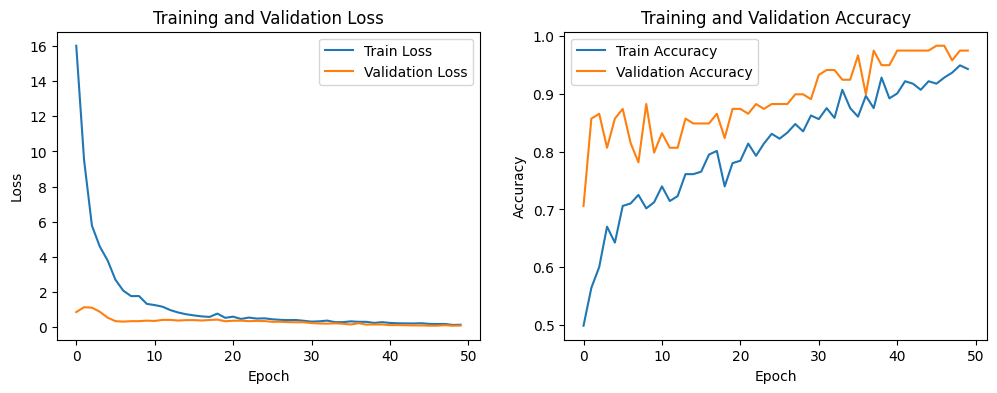

In [ ]:
import matplotlib.pyplot as plt

# 학습 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 학습 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [ ]:
# 테스트할 파일 경로 리스트
test_files = [
    '/content/drive/MyDrive/뿡뿡이걸/real/서울여자대학교 64.wav',
    '/content/drive/MyDrive/뿡뿡이걸/real/0812Yena_14.wav',
    '/content/drive/MyDrive/뿡뿡이걸/fake/Exercise is important for 1.wav',
    # 필요한 만큼 추가
    '/content/drive/MyDrive/뿡뿡이걸/test/Jiye_test_1.wav',
    '/content/drive/MyDrive/뿡뿡이걸/test/Test.wav',
    '/content/drive/MyDrive/뿡뿡이걸/test/gg_test_1.wav'
]

# 각 파일에 대해 예측 수행
for file in test_files:
    # 파일에서 특징 추출
    test_feature = extract_features(file)

    # 2D 배열로 변환
    test_feature = np.expand_dims(test_feature, axis=0)

    # 모델 예측
    prediction = model.predict(test_feature)

    # 예측 결과 출력
    if prediction > 0.5:
        print(f"The model predicts that the audio '{os.path.basename(file)}' is Real with a probability of {prediction[0][0]:.2f}")
    else:
        print(f"The model predicts that the audio '{os.path.basename(file)}' is Fake with a probability of {1 - prediction[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
The model predicts that the audio '서울여자대학교 64.wav' is Real with a probability of 0.88
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The model predicts that the audio '0812Yena_14.wav' is Real with a probability of 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The model predicts that the audio 'Exercise is important for 1.wav' is Fake with a probability of 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The model predicts that the audio 'Jiye_test_1.wav' is Real with a probability of 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The model predicts that the audio 'Test.wav' is Fake with a probability of 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The model predicts that the audio 'gg_test_1.wav' is Fake with a probability of 0.72


In [ ]:
model.save('/content/drive/MyDrive/뿡뿡이걸/network_PungPung.keras')

In [ ]:
from tensorflow.keras.models import load_model

# 저장된 모델 로드
loaded_model = load_model('/content/drive/MyDrive/뿡뿡이걸/network_PungPung.keras')

# 모델 평가 (예: 로드 후 테스트 데이터로 평가)
test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test)
print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0520  
테스트 손실: 0.0488
테스트 정확도: 0.9865
